In [390]:
'''
The following code implements Logistic Regression From scratch using Stochastic Gradient Descent
1) We have shuffled the data so every run might give a different predicted result
2)Inside the Stochastic Gradient Descent the data which is to be used for updating the weights is selected randomly
  this might give different result in each run
3) We can see from the plot that Stochastic Gradient Descent doesnt have a avery smooth loss vs epoch graph
4) We have used SGD Classifier from sklearn with loss ='log' 
   as the Logistic Regression Classifier in sklearn doesnt provide SGD method
'''

"\nThe following code implements Logistic Regression From scratch using Stochastic Gradient Descent\n1) We have shuffled the data so every run might give a different predicted result\n2)Inside the Stochastic Gradient Descent the data which is to be used for updating the weights is selected randomly\n  this might give different result in each run\n3) We can see from the plot that Stochastic Gradient Descent doesnt have a avery smooth loss vs epoch graph\n4) We have used SGD Classifier from sklearn with loss ='log' \n   as the Logistic Regression Classifier in sklearn doesnt provide SGD method\n"

In [391]:
#Import libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
df=pd.read_csv("sobar-72.csv")
df = df.sample(frac = 1)  #To shuffle the data
df.head()

behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
14                    2               15                       15   
9                     7               15                        7   
52                   10                9                       12   
1                    10               11                       11   
45                   10               15                       14   

    intention_aggregation  intention_commitment  attitude_consistency  \
14                      6                    13                     8   
9                       6                    11                     8   
52                     10                    14                     9   
1                      10                    14                     7   
45                     10                    11                    10   

    attitude_spontaneity  norm_significantPerson  norm_fulfillment  \
14                     9                       1                 3   
9                      8                       5                 3   
52                     6                       5                11   
1                      7                       5                 5   
45                     8                       5                11   

    perception_vulnerability  perception_severity  motivation_strength  \
14                         3                    4                   15   
9                          3                    4                   15   
52                        11                    9                   15   
1                          4                    2                   15   
45                        15                   10                   15   

    motivation_willingness  socialSupport_emotionality  \
14                       3                           7   
9                        3                           8   
52                      11                           3   
1                       13                           7   
45                      15                          15   

    socialSupport_appreciation  socialSupport_instrumental  \
14                           6                           7   
9                            2                           9   
52                           2                           6   
1                            6                           5   
45                          10                          15   

    empowerment_knowledge  empowerment_abilities  empowerment_desires  \
14                      7                      7                    3   
9                       3                      4                    4   
52                     13                      7                    3   
1                       5                      4                    4   
45                     15                     15                   15   

    ca_cervix  
14          1  
9           1  
52          0  
1           1  
45          0

In [392]:
#Separating the input features from output labels
X= df.iloc[:,:-1]
Y=df.iloc[:,-1] 
X.shape
Y.shape

(72,)

In [393]:
#Splitting into Train and Test data
X_train = df.iloc[:64, :19]
Y_train = df.iloc[:64, 19:]
X_test = df.iloc[64:, :19]
Y_test = df.iloc[64:, 19:]

In [394]:
#Logistic Regression Class
class LogisticRegression(object): 
    #Sigmoid Function
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
      
    #Function which finds the loss
    def logloss(self,Y_test,y_pred):
        sum = 0
        for i in range(len(Y_test)):
            sum += (Y_test[i] * np.log10(y_pred[i])) + ((1 - Y_test[i]) * np.log10(1 - y_pred[i]))
        loss = -1 * (1 / len(Y_test)) * sum
        return loss

    #Function which does the Stochastic Gradient Descent
    def stochastic_grad_descent(self, X_train, Y_train, epochs, learning_rate= 0.001):
        
        #find no. of features(columns) in the dataset
        num_of_features = X_train.shape[1]
        
        #defining intial model parameters vector
        w = np.zeros(shape=(num_of_features))
        b = 0 #bias
        
        total_samples = X_train.shape[0]
        train_loss = []
        for i in range(epochs):
            #Randomly select any data for training
            random_index = random.randint(0,total_samples-1)
            sample_x = X_train[random_index]
            sample_y = Y_train[random_index]

            y_predicted = np.dot(w,sample_x.T)+b
            
            #Find the gradients
            w_grad = -1*(sample_x.T)*(sample_y - self.sigmoid(y_predicted))
            b_grad = -1*(sample_y - self.sigmoid(y_predicted))

            #Update the weights
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            
            #Getting the train prediction for each epoch along with the loss, to plot it
            train_pred = []
            for i in range(len(X_train)):
                train_pred.append(self.sigmoid(np.dot(w, X_train[i]) + b))
            loss = self.logloss(Y_train, train_pred)
            train_loss.append(loss)
        return w,b, train_loss
 

In [395]:
model=LogisticRegression()
w, b, train_loss = model.stochastic_grad_descent(X_train.values,Y_train.values,1000)
print("weights: ")
print(w)
print("\nBias: ")
print(b)

weights: 
[ 0.09632067  0.23586197  0.00917509 -0.01781233 -0.02029861  0.18348277
  0.13551902 -0.00249355 -0.13669602 -0.08113358 -0.17069029 -0.05164138
 -0.04712372 -0.02317146 -0.04051646  0.16212381 -0.13938755 -0.19793158
 -0.18979029]

Bias: 
[0.01926158]


<function matplotlib.pyplot.show(close=None, block=None)>

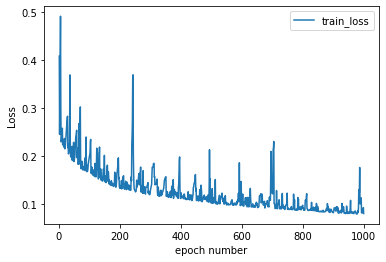

In [396]:
#Plot the loss vs epoch for training data
epoch = [i for i in range(1,1001,1)]

plt.plot(epoch,train_loss , label='train_loss')
plt.xlabel("epoch number")
plt.ylabel("Loss")
plt.legend()
plt.show

In [397]:
#Class to do the prediction
class predict(object):
    #Sigmoid Function
    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig 
    
    #Function to print the accuracy percentage
    def accuracy(self, predictions, Y_test):
        correct = 0
        for i in range(len(Y_test.values)):
            if(predictions[i] == Y_test.values[i]):
                correct += 1
        print("Accuracy is: ", correct * 100.00/len(Y_test.values))
    
    #Function to find the predictions and match it with the given outputs
    def prediction(self, X_test, Y_test, w, b):
        predictions = []
        for i in range(len(X_test.values)):
            z = np.dot(w, X_test.values[i]) + b
            y_pred = self.sigmoid(z)
            if y_pred>=0.5:
                predictions.append(1)
            else:
                predictions.append(0)
        self.accuracy(predictions, Y_test)
        return predictions

In [398]:
#Calling the prediction class and printing the results
pred = predict()
result = pred.prediction(X_test, Y_test, w, b)

Accuracy is:  87.5


In [399]:
#Print the value of actual and predicted results
print("Predicted Result: ")
print(result)
print("\nActual Results: ")
print(Y_test.values)


Predicted Result: 
[0, 0, 0, 1, 0, 0, 0, 0]

Actual Results: 
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]


Library Implementation

In [400]:
#Logistic Regression using SGD
#Notice that Logistic Regression Classifier in Sklearn doesnt provide SGD, 
#hence we use SGD classifier in which we put loss ='log' to do logistic regression with SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss ='log', eta0 = 0.001, learning_rate = 'constant', n_iter_no_change=1000, verbose = True)
print(sgd)
 
sgd.fit(X_train, Y_train.values.ravel())

score = sgd.score(X_train, Y_train.values.ravel())
print("Training score: ", score)


SGDClassifier(eta0=0.001, learning_rate='constant', loss='log',
              n_iter_no_change=1000, verbose=True)
-- Epoch 1
Norm: 0.10, NNZs: 19, Bias: 0.002016, T: 64, Avg. loss: 0.608943
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.17, NNZs: 19, Bias: 0.003974, T: 128, Avg. loss: 0.470258
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.22, NNZs: 19, Bias: 0.005594, T: 192, Avg. loss: 0.408763
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 19, Bias: 0.007627, T: 256, Avg. loss: 0.370393
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.29, NNZs: 19, Bias: 0.008345, T: 320, Avg. loss: 0.307499
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.33, NNZs: 19, Bias: 0.009644, T: 384, Avg. loss: 0.312929
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 19, Bias: 0.011023, T: 448, Avg. loss: 0.285487
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.38, NNZs: 19, Bias: 0.013174, T: 512, Avg. loss: 0.251145
Total training time: 0.00

Norm: 2.25, NNZs: 19, Bias: 0.128541, T: 32256, Avg. loss: 0.031482
Total training time: 0.19 seconds.
-- Epoch 505
Norm: 2.25, NNZs: 19, Bias: 0.128601, T: 32320, Avg. loss: 0.032834
Total training time: 0.19 seconds.
-- Epoch 506
Norm: 2.25, NNZs: 19, Bias: 0.128419, T: 32384, Avg. loss: 0.031484
Total training time: 0.19 seconds.
-- Epoch 507
Norm: 2.25, NNZs: 19, Bias: 0.128681, T: 32448, Avg. loss: 0.032797
Total training time: 0.19 seconds.
-- Epoch 508
Norm: 2.25, NNZs: 19, Bias: 0.129145, T: 32512, Avg. loss: 0.030195
Total training time: 0.19 seconds.
-- Epoch 509
Norm: 2.26, NNZs: 19, Bias: 0.129052, T: 32576, Avg. loss: 0.032753
Total training time: 0.19 seconds.
-- Epoch 510
Norm: 2.26, NNZs: 19, Bias: 0.129237, T: 32640, Avg. loss: 0.031350
Total training time: 0.19 seconds.
-- Epoch 511
Norm: 2.26, NNZs: 19, Bias: 0.129215, T: 32704, Avg. loss: 0.032744
Total training time: 0.19 seconds.
-- Epoch 512
Norm: 2.26, NNZs: 19, Bias: 0.129168, T: 32768, Avg. loss: 0.031794
Tota

Training score:  1.0


C:\Users\91720\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [401]:
#Print SGD Logistic Regression Actual Results
print("SGD with logistic regression output: ")
sgd.predict(X_test)

SGD with logistic regression output: 


array([0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [402]:
#Print the SGD Logistic Regression Score
print("Accuracy is: ")
100.00 * sgd.score(X_test,Y_test)

Accuracy is: 


87.5